In [2]:
from IPython.display import display, HTML # type:ignore
style = '<style> body { font-family: Akaar; font-size: 16px; } </style>'
display(HTML(style))

# <div style="font-family:fantasy">Introduction to Atrificial Neural Network</div>
The first artificial neuron had one or more binary inputs and one output. The AN activates its output when more than a certain number of inputs are active.
**Logical Computations.**\
<img src="https://www.oreilly.com/api/v2/epubs/9781492037354/files/assets/mlst_1003.png" width="400" height="200">

### <div style="font-family:fantasy">Perceptron</div>
One of the simples ANN architecture based the threshold logic unit (TLU) or some times linear threshold logic unit. Inputs and ouputs are numbers instead of boolean values. Each input connection is associated with a weight. TLU computes the weighted sum of the inputs.\

>$$ 
>z=w_1x_1+w_2x_2...w_nx_n = \mathbf{X}^T\cdot \mathbf{W}
>$$.
Then it applies a step function to the sum and outputs the result 
>$$ 
>h_w(\mathbf{X}) = step(z)
>$$.
<img src="https://www.oreilly.com/api/v2/epubs/9781492037354/files/assets/mlst_1004.png" width="400" height="200">

more common step functions used are heaviside and signum.

>$$
>\begin{equation}
>heaviside(z) = 
>\begin{cases}
>0, & \text{if} z < 0 \\
>1, & \text{if} z > 0 \\
>\end{cases}
>\end{equation}
>$$

>$$
>\begin{equation}
>signum(z) = 
>\begin{cases}
>-1, & \text{if} z < 0 \\
>0, & \text{if} z = 0 \\
>1, & \text{if} z > 0 \\
>\end{cases}
>\end{equation}
>$$

A single TLU computes linear combination of inputs and if result exceeds a threshold it outputs the positive class otherwise negative class. Training the TLU means finding the right value of $\mathbf{W}$. A perceptron is connected woth a layers of TLU with each TLU connected to all the inputs. When all the neurons in layer are connected to every neuron in the previous layer it is called fully connected layer ot dense layer. The inputs are fed through input neurons they output whatever input is fed. It forms input layer. An axtra bias feature is added in the input layer ($x_0=1$). It is typically represented by the bias neuron.
<img src="https://www.oreilly.com/api/v2/epubs/9781492037354/files/assets/mlst_1005.png" width="400" height="200">

To compute the outputs of a fully connected layer.

>$$
>h_{\mathbf{W},\mathbf{b}}(\mathbf{X}) = \phi(\mathbf{X}\mathbf{W}+\mathbf{b})
>$$

**X** is the input feature\
**W** is the weight matrix (one row per input, one column per AN layer ) except the bias\
**b** bias vector weight from the bias neuron to the neurons of the next AN layer.
$\phi$ activation function (when neurons are TLU it is step function)
<u>Hebb's rule</u>: connection between the two neurons tend to increase when they fire simultaneously.\ 
Perceptron training use this rule that takes into account the error made by the network when it makes a preiction, the perceptron learning rules reinforeces the connection weights that help reduce the errors.

>$$
>w_{i,j}^{\text{next step}} = w_{i,j}+\eta(y_j-\hat{y}_j)x_i
>$$
* $w_i$, j is the connection weight between the ith input neuron and the jth output neuron.

* $x_i$ is the ith input value of the current training instance.

* $\hat{y}_j$ is the output of the jth output neuron for the current training instance.
 
* $y_j$ is the target output of the jth output neuron for the current training instance.
 
* $\eta$ is the learning rate.
**perceptron convergence theorem**: Decision boundary of each output neuron is linear thus they are not capable of complex learning patterns. However if the training instance are linearly separable this would converge to a solution. (Now here comes the concept of MLPs i.e. multi layered perceptron as they have several layers s they no longer just support linear boundaries. They can perform more complex classifications and regressions). A single level perceptron resembles SDG with ```loss = 'perceptron'```. It cannot do simple XOR operation( while MLPs can)

<img src="https://www.oreilly.com/api/v2/epubs/9781492037354/files/assets/mlst_1006.png" width="400" height="300">

In the above figure the weights have been changed for the bias( not all the weights are assigned to 1)
Now it can specifically solve XOR
ex = input is X=(1,1)
for the first neuron (non-input) (from left),\
(1,1,1).(1.5,1,1) = 0.5 =>h(0.5) = 1\
for the second neuron (non-input) (from left),\
(1,1,1).(-0.5,1,1) = 1.5 =>h(1.5) = 1\
for the otuput neuron on the top,\
(1,1,1).(-0.5,-1,1) = -1.5 =>h(-1.5) = 0\
Thus it solves 1 $\oplus$ 1 = 0


In [3]:
# perceptron training demo
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
iris = load_iris()
X = iris.data[:80,(2,3)] #type: ignore
X_val = iris.data[80:,(2,3)] #type: ignore
y = (iris.target[:80]==0).astype(np.int32) #iris setosa #type: ignore
y_val = (iris.target[80:]==0).astype(np.int32) #type: ignore
per_clf = Perceptron()
per_clf.fit(X,y)
y_pred = per_clf.predict(X_val)
accuracy_score(y_val,y_pred)


1.0

this can also be done using SGD

In [4]:
from sklearn.linear_model import SGDClassifier
sdg_reg = SGDClassifier(loss='perceptron',eta0=0.1,learning_rate='constant')
sdg_reg.fit(X,y)
y_pred = sdg_reg.predict(X_val)
accuracy_score(y_val,y_pred)

1.0

# <div style="font-family:fantasy">Multilayered Perceptron</div>
<div style="font-family:fantasy">construction</div>

It does have one input layer, one or more layers of TLUs called hidden layers and one final output layer.

<img src="https://www.oreilly.com/api/v2/epubs/9781492037354/files/assets/mlst_1007.png" width="400" height="200">

Every layer except the output layer includes a bias neuron and is fully connected to the next layer. When an ANN has two or more hidden layers, it is called a deep neural network (DNN). Signals in only one direction from input to output is called *feed forward* NN

<div style="font-family:fantasy">working Algorithm (Backpropagation)</div>

* Handles one minibatch at a time and it goes through the full training set many times. Each pass is called epoch. 
* Each minibatch set is passed to input layer. Then outputs for each layer are computed based on outputs for each layer are computed based on the outputs of the previous layer till the final output layer. This is forward pass. Here all the intermediate results are preserved since they are needed for the backward pass.
* It uses loss function to compute network output error.
* computes how much each output contributed to the error. This is done by applying chain rule(of calculus differentiation). This contribution to error calculation progresses in backward direction until it reaches input layer. It measures gradient accross all the connection weights in the network by propagation of error gradients in the bacward direction.
* Algorithm performs gradient descent to tweak all the connection weights in the network using error gradients it just computed
It is important to initialize the connection weights of all the hidden layers to random numbers to maintain the diversity btwn each neuron. In order for the backpropagation to work properly $\phi$ is replaced with logistic sunction or sigmoid.

>$$
>\sigma(z) = \frac{1}{1+\exp{(z)}}
>$$
This is beacuse the step function contain flat segments only so there is no gradient to work with, while $\sigma(z)$ has non-zero derivatives everywhere.
Some other popular choices for $\phi$ are 
* $\tanh{(z)} = 2\sigma(2z)-1$ the range of this function is (-1,1) hence more centered wrt 0 thus helps to speed up the convergence at the begining 
* rectified linear unit function ReLU(z) = max(0,z) is continuous every where but not differentiable at z<0. It is fast to compute hence has become the default

<div style="font-family:fantasy">Mathematical background</div>

1. Perceptron

<img src="https://dsm04pap003files.storage.live.com/y4mdZWOnL-XcHF70UOTd3jvLxWJumqPGwEg7fhfd7T-wndl00XEQxosyGtp94e4pluAb3XhiSMRnkpdeQ0p9lJMXZn-LnE1qDs_g8FTH9x2ujdrPaeK0Zjv_emsJD2kyX4SRVPpUTxxRQPsSaFTnqA7ULa01jSIs0J4cu9RI_KkzjrBZTdrtkqOYga7pLfAFfXz?width=2160&height=1129&cropmode=none" width="500" height="300">

>$z=w_1x_1+w_2x_2+b$
>$\hat{y} = step(z)$

2. Logistic regression

<img src="https://dsm04pap003files.storage.live.com/y4mjebF_OaA1DZOa1sABn9Wpen2E9clAr-yCrpe-fBj2HkRUNh2GT6tJL23B3pgpUJ3CubA_SkDcVE3dJibRgbqxGDvkzYy2RD88jZ8DJV9mdCm1njZWuRb7COPkhmRmiQN5On9NVE0xRkHvSozYyMMU2hQfKDxm-NhuHPgc8tMbCDGSlOl85b3ULNYdvBFgxku?width=2160&height=1181&cropmode=none" width="500" height="200" />

>$z=w_1x_1+w_2x_2+b$
>$\hat{p} = \sigma(z) = \frac{1}{1+exp(-z)}=$ predicted probability

3. General Neural network

<img src="https://dsm04pap003files.storage.live.com/y4mCVj6gYWAm2HrCN7i42vcuzwiPy4naLKbbBFnektAMMy0VUW6RTYeITKENCjrWh27aPT01FW3Il1OLe0PCe5jMBPJtKvWXZgBwiKSK8yD0EOjOi4yH9aove6IpPneXodR4wsf1OCHHi46DbBHaHKvj2lvfB-QujFVRNBBOnFaxHdQKYryoAgnMwvx9dOogpSR?width=2160&height=1193&cropmode=none" width="600" height="300" />

<u>step 1</u>:
>$$
>\begin{bmatrix}
>z_1^{(1)} = w_{11}^{(1)}x_1 + w_{21}^{(1)}x_2 +b_1^{(1)}\\
>\\
>z_2^{(1)} = w_{12}^{(1)}x_1 + w_{22}^{(1)}x_2 +b_2^{(1)}\\
>\end{bmatrix}
>$$

<u>step 2</u>:
>$$
>\begin{bmatrix}
>h_1 = \sigma(z_1^{(1)})\\
>\\
>h_2 = \sigma(z_2^{(1)})\\
>\end{bmatrix}
>$$

<u>step 3</u>:
>$$
>\begin{bmatrix}
>z^{(2)} = w_1^{(2)}h_1+w_2^{(2)}h_2+b^{(2)}
>\end{bmatrix}
>$$

<u>step 4</u>:
>$\hat{p} = \sigma(z^{(2)})$

<u>Matrix form </u>:
>$$
\begin{matrix}
>\mathbf{Z}^{(1)} = \mathbf{W}^{(1)}\mathbf{X} + \mathbf{b}^{(1)}\\
>\\
>\mathbf{h} = \sigma(\mathbf{Z}^{(1)})\\
>\\
>\mathbf{Z}^{(2)} = \mathbf{W}^{(2)}\mathbf{h} + \mathbf{b}^{(1)}\\
>\\
>\hat{p} = \sigma(\mathbf{Z}^{(2)})
\end{matrix}
>$$

##### _**Backpropagation**_
*A prerequite*:\
$p = \sigma(x) = \frac{1}{1+e^{-x}}$

=>$\frac{d p}{d x} = \frac{e^{-x}}{(1+e^{-x})^2} = p(1-p)$

*error function*:\
$L_i=\frac{1}{2}||\hat{p}-y||^2 = \sum_{i=1}^{N}\frac{1}{2}[\hat{p}_i-y_i]^2$\
where N is the number of training instances.

*computations*:\
Now first compute,$\frac{\partial L}{\partial w_1^{(2)}}$

$
\begin{matrix}
\frac{\partial L}{\partial w_1^{(2)}} = \sum_{i=1}^{N}\frac{\partial L_i}{\partial w_1^{(2)}} \text{ i.e path } h_1 \ to \ \hat{p}_i\\
\\
=>\frac{\partial L_i}{\partial w_1^{(2)}}= \frac{\partial z^{(2)}}{\partial w_1^{(2)}} \times \frac{\partial \hat{p}_i}{\partial z^{(2)}} \times\frac{\partial L_i}{\partial \hat{p}_i} \text{ (using chain rule)}\\
\\
=[h_1] \times [\hat{p}_i(1-\hat{p}_i)] \times [\hat{p}_i - y_i]
=h_1\delta_{\hat{p}_i}\\
\end{matrix}
$\

Now again compute, $\frac{\partial L_i}{\partial w_{21}^{(1)}}$ that is path from $x_2$ to $h_1$\
$
\begin{matrix}
\\
\frac{\partial L_i}{\partial w_{21}^{(1)}} = \frac{\partial z_1^{(2)}}{\partial w_{21}^{(2)}} \times \frac{\partial h_1}{\partial z_1^{(1)}} \times \frac{\partial z^{(2)}}{\partial h_1} \times \frac{\partial \hat{p}_i}{\partial z^{(2)}} \times \frac{\partial L_i}{\partial \hat{p}_i} \text{ (using chain rule)}\\
\\
=[x_2]\times[h_1(1-h_1)]\times[w_1^{(2)}]\times[\hat{p}_i(1-\hat{p}_i)]\times[\hat{p}_i-y_i]\\
\\
=x_2h_1(1-h_1)w_1^{(2)}\delta_{\hat{p}_i} = x_2\times h_1(1-h_1)\times\delta_{h_1} = (from)\times(to)\times\delta_{to}\\
\\
\end{matrix}
$\
Thus for $\frac{\partial L_i}{\partial w_{12}^{(1)}}$ i.e from $x_1$ to $h_2$ = $x_1\times h_2(1-h_2)\times\delta_{h_2}$.\
Thus here we see with every layer of AN the error is propagating and equating this deriavtive of loss funtion to 0 gives us the gradient at each connection using which we perform the gradient descent and determine the optimal values of $\mathbf{W}$ and $\mathbf{b}$

# <div style="font-family:fantasy">MLP for regression</div>
Here we do not use any activation function for the output neurons so they are free to output any range of values. Thus we can use the ReLU activation function for output layers else softplus activation function. $softplus(z)=\log(1+exp(z))$. Finally if we want to gurantee prediction that predictions will fall within a given range of values thenwe can use logistic regression function or hyperbolic tangent and scale the labels to appropriate range we can use hubbers loss function(a combination of $l1$ and $l2$ loss functions)
$$
HL =
\begin{cases}
l2,&\text{ if } error<\delta\\
l1,&\text{ if } error>\delta\\
\end{cases}
$$
linear part makes it less sensitive to outliers and quadratic part allows it to converge faster and be more precise than $l1$ error



# <div style="font-family:fantasy">Implementing MLPs with Keras</div>


In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__,keras.__version__

('2.12.0', '2.12.0')

### <div style="font-family:fantasy;">Building an image classifier using sequential API</div>



In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

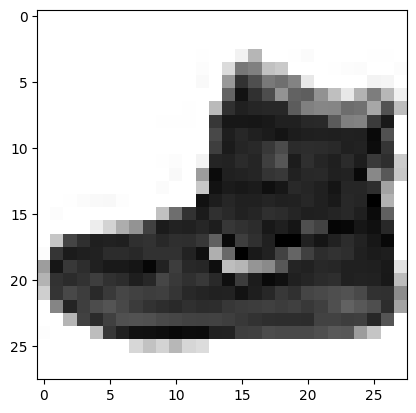

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train_full[0],cmap='binary')

Now we need a validation set from the training set. Also as we will train our neural network using Gradient Descent then so we should scale our input features. Thus we bring the pixels in down to in the range 0-1

In [10]:
X_valid,X_train,X_test = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0,X_test/255.0
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]

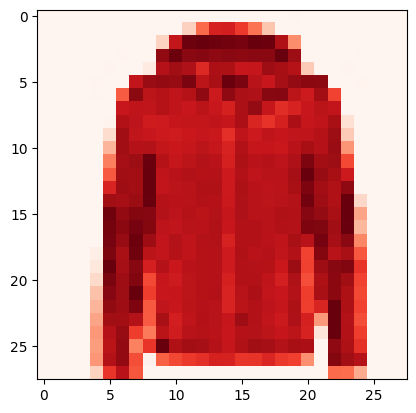

In [11]:
plt.imshow(X_train[0],cmap="Reds")

Here we need to explicitly define the class names the following class names have been taken from the book

In [12]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [13]:
class_names = ["T-shirt/top","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneakers","Bag","Ankle Boot"]
class_names[y_train[0]]

'Coat'

Here we build a neural network with two hidden layers using sequential api

In [14]:
# simplest keras model composed of single stack of layers connected sequentially
model = keras.models.Sequential()

#first,layer of the model, role is to convert each input into an 1D array thus we have used flatten.
# if it recieves X, it computes X.reshape(-1,1). We need to specify the input shape for the first layer.
#alternatively we can use keras.layers.InputLayer(input_shape=[28,28])
model.add(keras.layers.Flatten(input_shape=[28,28]))

#we add a dense layer(first hidden layer) with 300 neurons that will use ReLU activation function. 
# Each of such dense layer manages its own weight matrix and a vector of bias terms
model.add(keras.layers.Dense(300,activation='relu',name='hidden1'))

#second dense layer (hidden layer)
model.add(keras.layers.Dense(100,activation='relu'))

#output layer with 10 neurons (i.e. 1 per class) this uses softmax activation function
model.add(keras.layers.Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 300)               235500    
                                                                 
 dense (Dense)               (None, 100)               30100     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


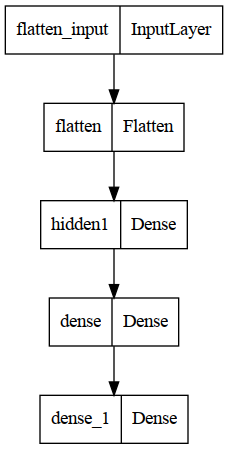

In [16]:
keras.utils.plot_model(model)

we can see there are a lot of parameters. This can make the model overfit only when very less number of data is available

In [17]:
model.layers

In [18]:
hidden1 = model.layers[1]

In [19]:
hidden1.name

'hidden1'

In [20]:
model.get_layer('hidden1') is hidden1

True

All the parameteers of the layer can be accessed using get weight and set weight

In [21]:
weights,biases = hidden1.get_weights()

In [22]:
weights.shape

(784, 300)

In [23]:
weights

array([[ 0.03006566,  0.01157558,  0.02074   , ...,  0.05172713,
        -0.03684393,  0.03913989],
       [-0.03140466,  0.02670597,  0.03846909, ..., -0.06674509,
        -0.0472322 ,  0.03509906],
       [ 0.01874004, -0.00348052, -0.00643624, ..., -0.04788692,
        -0.02688803,  0.00842904],
       ...,
       [-0.04530234, -0.03219036,  0.04395688, ..., -0.04851828,
        -0.00687166, -0.0596063 ],
       [-0.00040616,  0.05332552, -0.05434116, ...,  0.0221475 ,
         0.00931282,  0.07362515],
       [-0.06339576, -0.0474619 , -0.04106263, ...,  0.02282326,
         0.04291612,  0.04839803]], dtype=float32)

the above is so because there are 28 $\times$ 28 = 784 input neurons connected to 300 other neurons of the first hidden layer and also note that these connections are generated randomly. Though we can set ```kernel_initializer``` and `bias_initializer` for using different initialization method.

In [24]:
biases.shape 

(300,)

ofcourse because there are 300 neurons in the first hidden layer thus 300 bias terms

Now if you do not provide the input size in in first layer the model will automatically assign some values to the number of inputs when u call the build method or while proviting training data to the model but until then you cannot call the summary.

##### <div style="font-family:fantasy">compiling the model</div>


here we finally compile the model by providing the loss function optimizer and metrics for measuring accuracy measure

In [25]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

here we use `sparse_categorical_crossentropy` because we have sparse labels that is we have 10 classes to choose upon each directly assigned values from 0-9. Instead if we had some one-hot vetors we would have used `categorical _crossentropy`. If we are doing binary classification then we can use `sigmoid` in the output layer instead of `softmax` and would use `binary_crossentropy` loss. Also we have used `sdg` as the optimizer that is we will train the model using backpropagation algorithm as described earlier. We can also set the learning rate by doing `optimizer=keras.optimizer.SGD(lr=0.01)`

##### <div style="font-family:fantasy">Training and evaluating model</div>


In [26]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

2023-06-09 14:00:13.498575: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/30
1715/1719 [============================>.] - ETA: 0s - loss: 0.7222 - accuracy: 0.7624

2023-06-09 14:00:26.594280: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15680000 exceeds 10% of free system memory.


1719/1719 [==============================] - 13s 7ms/step - loss: 0.7218 - accuracy: 0.7625 - val_loss: 0.5122 - val_accuracy: 0.8244
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4864 - accuracy: 0.8312 - val_loss: 0.4406 - val_accuracy: 0.8514
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4411 - accuracy: 0.8453 - val_loss: 0.4647 - val_accuracy: 0.8346
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4124 - accuracy: 0.8548 - val_loss: 0.3903 - val_accuracy: 0.8670
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3928 - accuracy: 0.8607 - val_loss: 0.4011 - val_accuracy: 0.8598
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3781 - accuracy: 0.8659 - val_loss: 0.3725 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3645 - accuracy: 0.8705 - val_loss: 0.3613 - val_accuracy: 0.8

`epoch` suggest the number of times the algorithm is run on the training instance. It also calculates the error after each epoch on the training and validation data. If there is a big difference then the model is propably overfitting the data(or a bug, such as data mismathch between the training and validation set). As we can see the training accuracy and validation accuracy do not differ by huge amount. That is a good sign. Thus the model here is not overfitting. we can set the class weight high in case some class are underrepresented and vice versa for overpresented.This can b done by setting `class_weight`. We can also set the weight for each instance by setting `sample_weight`. fit returns a history which can be used to derive info about the model as described below.

In [54]:
history.params #the training paramters

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [55]:
history.epoch #the list of epochs it went through


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [56]:
history.history #loss, accuracy, val_loss and val_accuracy at each epoch in the form of a dictionary

{'loss': [0.7245148420333862,
  0.49180474877357483,
  0.44598621129989624,
  0.4181451201438904,
  0.3959883451461792,
  0.38015806674957275,
  0.36524587869644165,
  0.3533961772918701,
  0.3436450958251953,
  0.33432504534721375,
  0.32558977603912354,
  0.3172856271266937,
  0.31039801239967346,
  0.3036155104637146,
  0.2973192036151886,
  0.29107266664505005,
  0.28479886054992676,
  0.2784164845943451,
  0.2741815745830536,
  0.26898398995399475,
  0.2645437717437744,
  0.2584874927997589,
  0.25493910908699036,
  0.25088104605674744,
  0.24546651542186737,
  0.24196358025074005,
  0.23736225068569183,
  0.23301082849502563,
  0.22988677024841309,
  0.2265242487192154],
 'accuracy': [0.7644000053405762,
  0.8291636109352112,
  0.8444363474845886,
  0.8538545370101929,
  0.8599818348884583,
  0.8660545349121094,
  0.8715090751647949,
  0.8743818402290344,
  0.8767091035842896,
  0.8807636499404907,
  0.8835636377334595,
  0.8863454461097717,
  0.889054536819458,
  0.8909999728202

In [57]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.724515,0.764400,0.511807,0.8216
1,0.491805,0.829164,0.445167,0.8526
2,0.445986,0.844436,0.424535,0.8546
3,0.418145,0.853855,0.402005,0.8640
4,0.395988,0.859982,0.377132,0.8734
5,0.380158,0.866055,0.375215,0.8692
6,0.365246,0.871509,0.362616,0.8734
7,0.353396,0.874382,0.353223,0.8752
8,0.343645,0.876709,0.357981,0.8736
9,0.334325,0.880764,0.350315,0.8722


(0.0, 1.0)

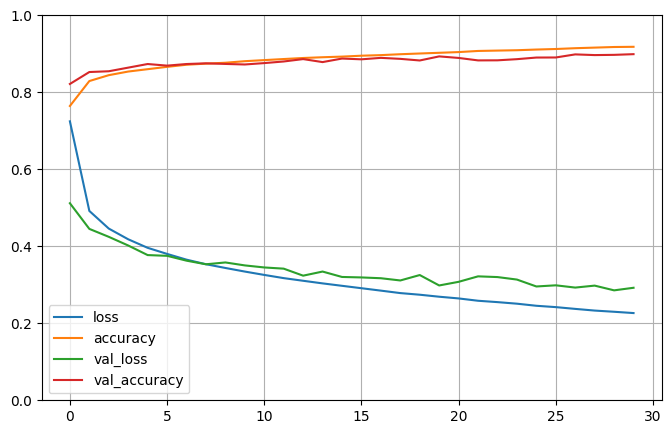

In [58]:
df.plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,1)

In this particular case, the model looks like it
performed better on the validation set than on the training set at the beginning of
training. But that’s not the case: indeed, the validation error is computed at the end of
each epoch, while the training error is computed using a running mean during each
epoch. So the training curve should be shifted by half an epoch to the left. The training set performance ends up beating the validation performance, as is gen‐
erally the case when you train for long enough. You can tell that the model has not
quite converged yet, as the validation loss is still going down, so you should probably
continue training. It’s as simple as calling the `fit()` method again, since Keras just
continues training where it left off.

Once you are satisfied with your model’s validation
accuracy, you should evaluate it on the test set to estimate the generalization error
before you deploy the model to production. You can easily do this using the `evaluate()` method it also supports several other arguments, such as batch_size and
`sample_weight`

In [59]:
model.evaluate(X_test,y_test)

  8/313 [..............................] - ETA: 2s - loss: 0.2949 - accuracy: 0.8945 

2023-06-04 11:24:08.361889: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 5ms/step - loss: 0.3297 - accuracy: 0.8820


[0.32974734902381897, 0.8820000290870667]

##### <div style="font-family:fantasy">using model to make predictions</div>


In [60]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 183ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

here the model predicts one probability per class

In [61]:
# we can also get the classes 
y_pred = np.argmax(model.predict(X_new),axis=1)
print(y_pred)
# accuracy_score calculation
accuracy_score(y_test[:3],y_pred)

1/1 [==============================] - 0s 40ms/step
[9 2 1]


1.0

### <div style="font-family:fantasy">Building Regression MLP using sequential API</div>



In [62]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [63]:
housing = fetch_california_housing()
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target)#type:ignore
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [64]:
df = pd.DataFrame(housing.data,columns=housing.feature_names)#type:ignore
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


The main differences between the classification model and this are
the fact that the output layer has a single neuron (since we only want to predict a sin‐
gle value) and uses no activation function, and the loss function is the mean squared
error. Since the dataset is quite noisy, we just use a single hidden layer with fewer
neurons than before, to avoid overfitting

In [65]:
#building
model = keras.models.Sequential()
model.add(keras.layers.Dense(30,activation=keras.activations.relu,input_shape=X_train.shape[1:])) #because we want the number of features
model.add(keras.layers.Dense(1)) #because we will predict a single value

In [66]:
#compiling
model.compile(loss=keras.losses.mean_squared_error,optimizer=keras.optimizers.SGD(learning_rate=1e-3))


In [67]:
#fitting
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 2.2846 - val_loss: 1.0305
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.8261 - val_loss: 0.7366
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7109 - val_loss: 0.6725
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6654 - val_loss: 0.6350
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6308 - val_loss: 0.6104
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6028 - val_loss: 0.5801
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5799 - val_loss: 0.5637
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5606 - val_loss: 0.5491
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5447 - val_loss: 0.5302
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5304 - val_loss: 0.5159

In [68]:
mse_test = model.evaluate(X_test,y_test)
mse_test

162/162 [==============================] - 0s 2ms/step - loss: 0.4599


0.4599434733390808

In [69]:
X_new = X_test[:3] # type: ignore
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 74ms/step


# <div style="font-family:fantasy">Building Complex Models Using Functional API</div>
*Wide & Deep* It connects all or part of the inputs directly to the output layer. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path).

<img src="https://dsm04pap003files.storage.live.com/y4mZffW45GvCtsAxAbJPRmUpfIjI7UuhaLCoVzFxSBMLPYfCUK1bfFhgAjGiOZWjLrWCamhRXOPTjxp9FPWdgcxaOxUY24RejEuci5LdzlJUNO8jXCQjtIicKcI95WnLSxMORrI9h18abBnSWZNXu-2U9XfXZ5tY9DgCcKPN6PGXLZ0esMwu7P_O5VCLeJBB6Ef?width=624&height=394&cropmode=none" width="600" height="300" />

In [70]:
X_train.shape[:1]

(11610,)

In [79]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation='relu')(input_)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_],outputs=[output])

* first layer is of the input with `dtype` and `shape`.
* then we create a `Dense` layer with 30 neurons using ReLU activation function. Then we call it as a function and pass the input layer to it. This API is thus functional as here we define how the layers are going to be connected.
* we then create a second layer and again we use it as a function. Note that we pass it the output of the first hidden layer.
* Now we create a concatenation layer for concatnating the input and the outout of the `hidden2` layer. 
* Then we create the output layer with a single neuron and no activation function and we call it like a function passing the result of concatenation layer. 
* then we model the keras by specifying the input and the ouput
after doing all this the next step is simply compiling and fitting.

---

Next comes the case where we want to pass one batch on the input through the wide path and another batch through deep path. Here's where we need two inputs.

<img src="https://dsm04pap003files.storage.live.com/y4mvh4jrE7BisZtEcWj6o2HYSvTEjXGmj2xuZ-f5BYfU1jJFUToTYIgy_R2Bo60AJjaC2IABGlM-Dvv6il26LY0sAB0Ej9cQmG1mnTbwLM_EUTMSp2XX6q8UxFTHvHABdkFAb1Olp3Ka__ANXNJ-qswdYiHkIdbWlhiZvbdEay4StKGQBZr6gR-2quPnLv_dBnD?width=578&height=444&cropmode=none" width="500" height="200" />

In [2]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

the only thing is while fitting this model we need to pass two inputs

In [81]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.9904 - val_loss: 1.1570
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7586 - val_loss: 0.6795
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6356 - val_loss: 0.5912
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5949 - val_loss: 0.5637
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5715 - val_loss: 0.5448
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5548 - val_loss: 0.5309
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5422 - val_loss: 0.5220
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5316 - val_loss: 0.5120
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5224 - val_loss: 0.5068
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5143 - val_loss: 0.4987

In [83]:
mse_test = model.evaluate((X_test_A,X_test_B),y_test)
y_pred = model.predict((X_new_A,X_new_B))

1/1 [==============================] - 0s 33ms/step


In [84]:
mse_test

0.4791209101676941

cases of multiple ouputs:
* you may want to locate and classify the
main object in a picture. This is both a regression task (finding the coordinates of
the object’s center, as well as its width and height) and a classification task
* you may have multiple independent tasks based on the same data. Sure,
you could train one neural network per task, but in many cases you will get better
results on all tasks by training a single neural network with one output per task.
This is because the neural network can learn features in the data that are useful
across tasks. For example, you could perform multitask classification on pictures
of faces, using one output to classify the person’s facial expression (smiling, sur‐
prised, etc.) and another output to identify whether they are wearing glasses or
not.
* Another use case is as a regularization technique (i.e., a training constraint whose
objective is to reduce overfitting and thus improve the model’s ability to general‐
ize). For example, you may want to add some auxiliary outputs in a neural net‐
work architecture (see Figure 10-16) to ensure that the underlying part of the
network learns something useful on its own, without relying on the rest of the
network.

<img src="https://dsm04pap003files.storage.live.com/y4maZZr2wG1TMeDcRJOLAVvt4ds0juu3yUM53ytpv9voi7UPa-lcxLiYa6QELDmnKx7uLdulFQ-qSWYyDbCw2qo2bvUWReuHVwa_szRiTLf8u6uDtkPk9yQjhayv7n86t7bEPBHn1nkw70qSnIX5PcexfgzwZ6SgzlF4-qspKnsqiZVNWz8y2nq5VUKx4QCJIBq?width=464&height=296&cropmode=none" width="464" height="296" />

In [96]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

each output will need its own loss function thus we pass a list of losses(if we pass a single loss, Keras will assume that the
same loss must be used for all outputs). Keras will compute all these losses
and simply add them up to get the final loss used for training. Thus, we can also give loss weights for weighted sum of the losses.


In [97]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")


In [98]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 0.9840 - output_loss: 0.8558 - aux_output_loss: 2.1377 - val_loss: 0.6149 - val_output_loss: 0.5512 - val_aux_output_loss: 1.1878
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5554 - output_loss: 0.4993 - aux_output_loss: 1.0600 - val_loss: 0.6723 - val_output_loss: 0.6311 - val_aux_output_loss: 1.0435
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5146 - output_loss: 0.4721 - aux_output_loss: 0.8974 - val_loss: 0.4735 - val_output_loss: 0.4356 - val_aux_output_loss: 0.8148
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4748 - output_loss: 0.4410 - aux_output_loss: 0.7788 - val_loss: 0.4618 - val_output_loss: 0.4329 - val_aux_output_loss: 0.7226
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4583 - output_loss: 0.4303 - aux_output_loss: 0.7103 - val_loss: 0.4491 - val_output_loss: 0.4241 - val_aux_

we will be retured 3 losses on evaluation. total, main & aux

In [99]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
print(total_loss,main_loss,aux_loss)

162/162 [==============================] - 1s 4ms/step - loss: 0.3885 - output_loss: 0.3730 - aux_output_loss: 0.5279
0.38849976658821106 0.3730071187019348 0.5279331207275391


now here we can predict the two outputs

In [100]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 77ms/step


### <div style="font-family:fantasy">Using the Subclassing API to Build Dynamic Models</div>


Some models involve loops, varying shapes, conditional branching,
and other dynamic behaviors. For such cases, or simply if you prefer a more impera‐
tive programming style, the Subclassing API is for you.

Simply subclass the Model class, create the layers you need in the constructor, and use
them to perform the computations you want in the `call()` method. 

In [101]:
class WideAndDeepModel(keras.Model):
    def __init__(self,units=30,activation='relu',**kwargs):
        super().__init__(**kwargs) # **kwargs handles standard arguments.
        self.hidden1 = keras.layers.Dense(units,activation=activation)
        self.hidden2 = keras.layers.Dense(units,activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self,inputs):
        input_A,input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A,hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output,aux_output
model = WideAndDeepModel()

        

In [102]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 3s 4ms/step - loss: 2.2681 - output_1_loss: 1.8334 - output_2_loss: 6.1810 - val_loss: 1.3862 - val_output_1_loss: 1.0366 - val_output_2_loss: 4.5322
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 1.1094 - output_1_loss: 0.8482 - output_2_loss: 3.4602 - val_loss: 0.9480 - val_output_1_loss: 0.7646 - val_output_2_loss: 2.5983
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.8859 - output_1_loss: 0.7353 - output_2_loss: 2.2414 - val_loss: 0.8065 - val_output_1_loss: 0.6874 - val_output_2_loss: 1.8785
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7837 - output_1_loss: 0.6754 - output_2_loss: 1.7582 - val_loss: 0.7376 - val_output_1_loss: 0.6419 - val_output_2_loss: 1.5982
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7265 - output_1_loss: 0.6342 - output_2_loss: 1.5570 - val_loss: 0.6880 - val_output_1_loss: 0.6013 - val_ou

This extra flexibility does come at a cost: your model’s architecture is hidden within
the `call()` method, so Keras cannot easily inspect it; it cannot save or clone it; and
when you call the `summary()` method, you only get a list of layers, without any infor‐
mation on how they are connected to each other. Moreover, Keras cannot check types
and shapes ahead of time, and it is easier to make mistakes
### <div style="font-family:fantasy">Saving and Restoring a Model</div>
when using the Sequential or Functional API we can save it by running the command:

      model.save('dlmodel.h5')
`dlmodel` can be repalaced with any name of choice.
Again to load the model we can call:

      model = keras.models.load_model('dlmodel.h5')
      

In [107]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [108]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 1.5192 - val_loss: 0.8354
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7202 - val_loss: 0.6655
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6542 - val_loss: 0.6201
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6191 - val_loss: 0.6012
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5945 - val_loss: 0.5732
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5718 - val_loss: 0.5497
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5537 - val_loss: 0.5418
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5384 - val_loss: 0.5239
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5227 - val_loss: 0.5161
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.5297


In [109]:
model.save("models/housing_price.h5")

In [111]:
model = keras.models.load_model("./models/housing_price.h5")

In [112]:
model.predict(X_new) #type:ignore

1/1 [==============================] - 0s 74ms/step


array([[1.5988476],
       [2.5174873],
       [3.0775604]], dtype=float32)


### <div style="font-family:fantasy">Using Callbacks</div>
If the training lasts for several hours then we can also save checkpoints at regular intervals during the training, to avoid losing everything. This can be done by using callbacks.

The fit() method accepts a callbacks argument that lets you specify a list of objects
that Keras will call at the start and end of training, at the start and end of each epoch,
and even before and after processing each batch. For example, the ModelCheckpoint
callback saves checkpoints of your model at regular intervals during training,

In [113]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint('./models/housing_price_cb.h5')
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.7836
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.7641
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6434
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6008
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5690
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5438
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5238
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5079
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4947
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4839


if we use validation set we can use `save_best_only=True` when creating `ModelCheckpoint`. In this case it will only save the model when it's performance is best so far. Thus we don't need to worry for training too long and overfitting of dataset: simply restore the last model saved after training(when calling the `keras.model.load_model()`), and this will be the best model
on the validation set.

```
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # roll back to best model
```

Another way to implement early stopping is to simply use the EarlyStopping call‐
back. It will interrupt training when it measures no progress on the validation set for
a number of epochs (defined by the patience argument), and it will optionally roll
back to the best model. You can combine both callbacks to save checkpoints of your
model (in case your computer crashes) and interrupt training early when there is no
more progress (to avoid wasting time and resources)
```
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb, early_stopping_cb])
```

The number of epochs can be set to a large value since training will stop automati‐
cally when there is no more progress. In this case, there is no need to restore the best
model saved because the EarlyStopping callback will keep track of the best weights
and restore them for you at the end of training.

**custom calback**
 an
example of how to do that, the following custom callback will display the ratio
between the validation loss and the training loss during training (e.g., to detect over‐
fitting):

```
class PrintTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        print(f"\nvaltrain:{logs['val_loss']/logs['loss']:.2f}")
```
you can implement `on_train_begin()`, `on_train_end()`,
`on_epoch_begin()`, `on_epoch_end()`, `on_batch_begin()`, and `on_batch_end()`.
Call‐backs can also be used during evaluation and predictions, should you ever need them
(e.g., for debugging). For evaluation, you should implement `on_test_begin()`,
`on_test_end()`, `on_test_batch_begin()`, or `on_test_batch_end()` ,(called by `evaluate()`), and for prediction you should implement `on_predict_begin()`, `on_predict_end()`, `on_predict_batch_begin()`, or `on_predict_batch_end()` (called by
`predict()`).

# <div style="font-family:fantasy">Vizualization using TensorBoard</div>

To use it, you must modify your program so that it outputs the data you want to visu‐
alize to special binary log files called *event files*. Each binary data record is called a
*summary*. The TensorBoard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations: this allows you to visualize
live data (with a short delay), such as the learning curves during training. In general,
you want to point the TensorBoard server to a root log directory and configure your
program so that it writes to a different subdirectory every time it runs. This way, the
same TensorBoard server instance will allow you to visualize and compare data from
multiple runs of your program, without getting everything mixed up.


In [136]:
import os
root_logdir = os.path.join(os.curdir,"my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H:%M:%S")
    return os.path.join(root_logdir,run_id)
run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2023_06_04-20:17:19'

now we use the TensorBoard callback

In [137]:
#model building and compiling 
model = keras.models.Sequential([
    keras.layers.Dense(30, activation=keras.activations.relu, input_shape=[8]),
    keras.layers.Dense(30, activation=keras.activations.relu),
    keras.layers.Dense(1)
])
model.compile(loss=keras.losses.mse, optimizer=keras.optimizers.SGD(learning_rate=5e-3))

In [138]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid),callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 5s 10ms/step - loss: 0.9295 - val_loss: 0.6435
Epoch 2/30
363/363 [==============================] - 2s 6ms/step - loss: 0.5077 - val_loss: 0.4683
Epoch 3/30
363/363 [==============================] - 3s 7ms/step - loss: 0.4544 - val_loss: 0.4497
Epoch 4/30
363/363 [==============================] - 2s 7ms/step - loss: 0.4253 - val_loss: 0.4227
Epoch 5/30
363/363 [==============================] - 4s 10ms/step - loss: 0.4065 - val_loss: 0.4149
Epoch 6/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3958 - val_loss: 0.3998
Epoch 7/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3867 - val_loss: 0.4021
Epoch 8/30
363/363 [==============================] - 2s 6ms/step - loss: 0.3804 - val_loss: 0.3854
Epoch 9/30
363/363 [==============================] - 2s 6ms/step - loss: 0.3841 - val_loss: 0.5023
Epoch 10/30
363/363 [==============================] - 3s 7ms/step - loss: 0.3952 - val_loss: 0.40

now we start the TensorBoard server by the following command.

    $ tensorboard --logdir=./my_logs --port=6006
in the terminal

and again to kill we can use 

    $ sudo kill -9 $(sudo lsof -ti:PORT_NO)

In [141]:
%load_ext tensorboard 


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Now we create a summary writer using `create_file_writer()` for some user defined logs and graphs etc.

In [143]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)


# <div style="font-family:fantasy">Fine Tuning Hyperparameters</div>
To tune the model for the best value of the hyperparameters the most naive apprach can be using `GridSearchCV` or `RandomizedSearchCV`. For this we wrapup our keras model. 


In [148]:
def build_model(n_hidden=1,n_neurons=30,learning_rate=3e-3,input_shape=[8]):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss = 'mse',optimizer=optimizer)
    return model

Now we create a `KerasRegressor` based on this `build_model()` function

In [149]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/tmp/ipykernel_156002/1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


`KerasRegressor` is a thin wrapper around the keras model built using the `build_model()`. Now we can use this object as a regular scikit learn regressor(note that we have not provided any params in `buil_model` so defaults will be used). We can train it using fit method and evaluate the scores as well using `score()` and make the predictions using `predict()` method.

In [150]:
keras_reg.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 1.2909 - val_loss: 0.6709
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.6321 - val_loss: 0.5975
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5703 - val_loss: 0.5309
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5275 - val_loss: 0.5020
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4987 - val_loss: 0.4765
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4782 - val_loss: 0.4748
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4643 - val_loss: 0.4496
Epoch 8/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4525 - val_loss: 0.4459
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4445 - val_loss: 0.4376
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4369 - val_lo

1/1 [==============================] - 0s 67ms/step


note that here the score is calculated not the loss thus it is opposite. Higher is better. Also as here several hyperparams are there thus we use Randomized search. 

In [153]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_hidden' : [0,1,2,3],
    'n_neurons' : np.arange(1,100),
    'learning_rate' : reciprocal(3e-4,3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg,param_dist,n_iter=10,cv=3)
rnd_search_cv.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 2s 4ms/step - loss: 4.9485 - val_loss: 3.7687
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 2.6504 - val_loss: 2.0731
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 1.6439 - val_loss: 1.3438
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 1.1671 - val_loss: 1.0016
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.9300 - val_loss: 0.8348
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8078 - val_loss: 0.7490
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7423 - val_loss: 0.7035
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7056 - val_loss: 0.6777
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6834 - val_loss: 0.6614
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6689 - val_lo

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fae62eb7690>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fae5bd62a50>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [154]:
rnd_search_cv.best_params_

{'learning_rate': 0.007536623143000498, 'n_hidden': 2, 'n_neurons': 31}

In [155]:
rnd_search_cv.best_score_

-0.32845398783683777

---
---
---